# Analyzing data science books dataset

### Dataset

This project uses the Data science books dataset available on Kaggle https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books.

### To-dos:

- EDA: Do more expensive books have better reviews?

- EDA: Do longer books have higher prices?

- What are the best Python books? What are the best ML books?

- Cluster analysis of book names / TF-IDF and K-means

- Amazon review scraping & Book review summary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv('final_book_dataset_kaggle 2.csv')
df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


## Exporatory analyses on DS books

### Price vs. reviews

In [6]:
px.scatter(df, x="price", y="avg_reviews",size="n_reviews")

### Price vs. book length

In [9]:
px.scatter(df, x="price", y="pages")

### Best Python books

In [10]:
# Select books based on title containing "Python"
python_books = df[df['title'].str.contains("Python")]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews','avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


### Best Machine learning books

In [11]:
# Select books based on title containing "Machine Learning"
ml_books = df[df['title'].str.contains("Machine Learning")]

# ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviews','avg_reviews'])
best_ml_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


## Clustering book titles

> 💡 What are the main types of Data Science books?

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df["title"])

In [13]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=600, n_init=10)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

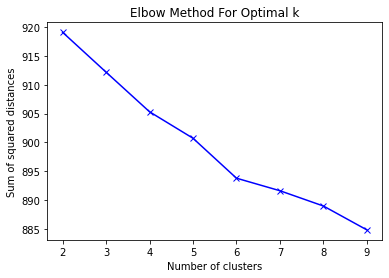

In [15]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
# Get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
945                  Psychology Statistics For Dummies        0
844  Discovering Statistics Using IBM SPSS Statisti...        0
845  AP Statistics Flashcards Fourth Edition: Up-to...        0
846  Outline of Basic Statistics: Dictionary and Fo...        0
847                           Essentials of Statistics        0
..                                                 ...      ...
55   Data Analytics: A Small Data Approach (Chapman...        5
158  A Criminologists Guide to R: Crime the Numbers...        5
289  Analysis of Categorical Data with R (Chapman &...        5
323  Time Series (Chapman & Hall/CRC Texts in Stati...        5
308  Statistical Rethinking: A Bayesian Course with...        5

[946 rows x 2 columns]


In [17]:
!pip install wordcloud==1.8.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


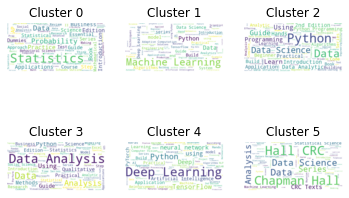

In [18]:
# Create wordclouds for clusters
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

In [19]:
cluster_num = '1'

In [20]:
# Books in clusters
book_cl[book_cl.cluster == int(cluster_num)]

,title,cluster
0,Becoming a Data Head: How to Think Speak and U...,1
14,Data Science on AWS: Implementing End-to-End C...,1
16,Machine Learning Design Interview: Machine Lea...,1
18,Business Data Science: Combining Machine Learn...,1
25,Data-Driven Science and Engineering: Machine L...,1
...,...,...
692,Machine Learning: A First Course for Engineers...,1
759,Interpretable Machine Learning with Python: Bu...,1
764,Hyperparameter Tuning with Python: Boost your ...,1
805,Practical Discrete Mathematics: Discover math ...,1


In [21]:
# Prediction on unseen data
test = vectorizer.transform(['tensorflow Deep learning'])
model.predict(test)[0]

4

## Scraping Amazon Book reviews

In [22]:
# Example urls
product_url = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/dp/1119741742/"
reviews_url  = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/product-reviews/1119741742/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"


In [23]:
def get_review_url(product_url):
    try:
        split_url = product_url.split('dp')
        product_number = split_url[1].split('/')[1]
        review_url = split_url[0] + 'product-reviews/' + product_number + "/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    except:
        review_url = None
    return review_url

In [24]:
# Create review urls for each book in dataset
df['review_urls'] = df['complete_link'].apply(lambda x: get_review_url(x))

# Remove empty review urls and create a new dataset
df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [25]:
df_reviews

,index,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,review_urls
0,0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...,https://www.amazon.com/Ace-Data-Science-Interv...
2,2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...,https://www.amazon.com/Fundamentals-Data-Engin...
3,3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...,https://www.amazon.com/Essential-Math-Data-Sci...
4,4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,940,5 Steps to a 5: AP Statistics 2023 Elite Stude...,"[Jared Derksen,DeAnna Krause McDonald]",28.00,NaN,NaN,0,0.00,0.00,0.00,0.00,0.00,8.4 x 1.3 x 10.7 inches,2 pounds,English,McGraw Hill; 1st edition (August 23 2022),978-1264500338,/Steps-Statistics-2023-Elite-Student/dp/126450...,https://www.amazon.com/Steps-Statistics-2023-E...,https://www.amazon.com/Steps-Statistics-2023-E...
779,941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...,https://www.amazon.com/Book-First-Course-Progr...
780,943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...,https://www.amazon.com/Elementary-Statistics-P...
781,944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...,https://www.amazon.com/Making-Sense-Statistics...


In [26]:
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
book_titles = df_reviews['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df_reviews['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

In [33]:
out

,review_text,review_stars,title
0,What is special about the book is the sequence...,5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
1,"IMHO, this is a really good overview of the da...",5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
2,I'm halfway through the book and have no qualm...,2.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
3,In a world where data continues exponential gr...,5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
4,"First and foremost, I know the main author wel...",5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
...,...,...,...
1111,"The problems in this book are hard, but so is ...",5.0 out of 5 stars,Ultimate AP Statistics Practice Book: 100 Esse...
1112,I bought this book to help me understand AP St...,5.0 out of 5 stars,Ultimate AP Statistics Practice Book: 100 Esse...
1113,"This is an awesome book, it has so far been he...",5.0 out of 5 stars,Ultimate AP Statistics Practice Book: 100 Esse...
1114,Needed this for an AP exam and it got here qui...,5.0 out of 5 stars,5 Steps to a 5: AP Statistics 2022


In [27]:
book_reviews = pd.read_csv('book_reviews_2023-01-09-01.csv')

# Aggregate reviews for each book title
book_reviews['review_text'] = book_reviews['review_text'].astype(str)
book_reviews_agg = book_reviews.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
book_reviews_agg

,title,review_text
0,5 Steps to a 5: AP Statistics 2022,Needed this for an AP exam and it got here qui...
1,A Primer on Machine Learning in Subsurface Geo...,This book has so many pictures! And they are i...
2,AI and Machine Learning for Coders: A Programm...,Met and exceeded my expectations. Great walkth...
3,An Adventure in Statistics: The Reality Enigma,When I was a psychology undergraduate I did ha...
4,An Introduction to Data Analysis: Quantitative...,Muy fácil de leer Dr. Bergin has written an ex...
...,...,...
162,Ultimate AP Statistics Practice Book: 100 Esse...,I have been using this for 4 years. I make my ...
163,Understandable Statistics: Concepts and Methods,An excellent substitute for the otherwise $130...
164,Using Python for Principles of Econometrics,This computing help guide replicates fully in ...
165,Web Scraping with Python: Collecting More Data...,This book fit my situation well. I'm pretty co...


> Install Bert extractive summarizer if not done already!

In [28]:
!pip install bert-extractive-summarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 15.6 MB/s eta 0:00:00


### Book reviews summarization

In [29]:
# Summarizing book reviews
from summarizer import Summarizer

bert_model = Summarizer()
bert_summary = ''.join(bert_model(book_reviews_agg.review_text[2], ratio = 0.2))
print(bert_summary)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Great walkthroughs and explanations on coding machine learning into different environment (using TensorFlow). The last chapter on ethics / federated learning felt a little short (but the fact it was there was already good). First, this book did a great job of explaining how tensorflow can be used to solve different types of problems, such as computer vision, natural language processing, and time series forecasting. It even went into text generation, which got my creativity going. You get the full tour in this book, from NLP coding to embedding your models in edge devices. I feel other Oreilly books should be like this. Code in Github and website of Laurence has good examplesThis is my 3rd book on Machine Learning, and I have seen different approaches to explaining complex concepts like How CNN works? Also highly recommend his training series with Andrew Ng! If you want to learn by doing, this is the right book for you. You have to figure out certain things for yourself by looking at th

In [30]:
print(book_reviews_agg.review_text[2])

Met and exceeded my expectations. Great walkthroughs and explanations on coding machine learning into different environment (using TensorFlow). Also good starter discussion on ML techniques. I especially liked the mx+b example of neural networks, very intuitive. Answered lots of questions I had about using my models, such as with JavaScript or using transfer learning.The last chapter on ethics / federated learning felt a little short (but the fact it was there was already good). I would have liked a little more on dealing with / identifying model drift and training on new data while not overwriting the weights of the old. Essentially more lifecycle stuff. Discussion of ML model deployment was all TensorFlow but like I really enjoyed it all. Tonight, I completed reading of Laurence Moroney’s book “AI and Machine Learning for Coders”. I enjoyed this book from cover to cover, and I am especially thankful for a few things.First, this book did a great job of explaining how tensorflow can be

In [31]:
from IPython.display import display, Markdown
display(Markdown(book_reviews_agg.review_text[2]))

Met and exceeded my expectations. Great walkthroughs and explanations on coding machine learning into different environment (using TensorFlow). Also good starter discussion on ML techniques. I especially liked the mx+b example of neural networks, very intuitive. Answered lots of questions I had about using my models, such as with JavaScript or using transfer learning.The last chapter on ethics / federated learning felt a little short (but the fact it was there was already good). I would have liked a little more on dealing with / identifying model drift and training on new data while not overwriting the weights of the old. Essentially more lifecycle stuff. Discussion of ML model deployment was all TensorFlow but like I really enjoyed it all. Tonight, I completed reading of Laurence Moroney’s book “AI and Machine Learning for Coders”. I enjoyed this book from cover to cover, and I am especially thankful for a few things.First, this book did a great job of explaining how tensorflow can be used to solve different types of problems, such as computer vision, natural language processing, and time series forecasting. It even went into text generation, which got my creativity going.Second, this book is written for coders, but it does explain how neural networks work at a high level. It doesn’t drop a wall of math on the reader, which I appreciated. I feel much more comfortable now, after reading this.And finally, the book ends by discussing interpretability, bias/fairness, and Google’s AI principles. I found that to be a beautiful ending.I give this five stars. The few issues I had were trivial. This book is outstanding. I’m so much better off for having read it. L Moroney delivered a great book introducing coders to the future of computing. Helped me a lot coming from  programming with theoritical knowledge on AI and ML get into creating my own tensorflow models. In late chapters some difficult to understand topics are not explained in depth but that's not the point of the book. SK Laurence is the teacher you always wish you had.  He covers every aspect of TensorFlow with deep yet tangible intelligence.  If you're worried about understanding the practice of machine learning and artificial intelligence, don't worry any longer.  This book guides you through various aspects of the TensorFlow framework, but it also leans into the varying aspects of popular AI problems.You get the full tour in this book, from NLP coding to embedding your models in edge devices.  Each section is overflowing with code samples to help you solidify what you're learning.10 out of 10, a cornerstone of any AI bookshelf. If you start with this book, watch Laurence's videos on the TensorFlow/ Google Developer youtube channel and work all the examples and exercises, you will have a solid foundation in deep learning. Then you could potentially learn more from the documentation itself or by using Aurélien Géron's book.I feel other Oreilly books should be like this.Although math is almost absent in this book (hence 'for coders'), Laurence does a great job explaining convolutions and maxpooling etc.. I've seen lectures from many sources that misattribute pixel/dimension reduction to the convolution step and not the pooling layer (worse yet, lump both together) but the author clearly explains the concepts. Laurence Moroney is an extremely gifted teacher with an uncanny ability to make optically complex tasks seem almost trivial.  For example, the chapters on time series analysis and sequencing models using AI are some of the clearest and most applicable examples that I've seen published so far (and forecasting is a very hot topic right now).  This book leverages Keras to demonstrate how some fairly astonishing things (image recognition, NLP, forecasting, etc) can happen with not that much code.  I almost think that this should be required reading for anyone concerned with AI explainability.  Thank you so much, Laurence Moroney. Laurence explains tough concept in easy way.Code in Github and website of Laurence has good examplesThis is my 3rd book on Machine Learning, and I have seen different approaches to explaining complex concepts like How CNN works? etc. The stye used by Laurence comes with many decades of experience to understand and I guess thats why he can explain so well. I am liking it :).I just finished Chapters 1, 2, and 3 with coding along the way.Will update again as I read and practice further.Thanks Laurence Moroney.Mahtab SyedMelbourne Laurence approaches the subject from an easy to understand perspective for software engineers. Also highly recommend his training series with Andrew Ng! Beginning few chapters are fine.... but the sample codes in the book start to misalign with the sample codes given in the GitHub, I had hard time to follow ... it seems the same codes are not properly tested as well, this can be seen from open issues on the GitHub and author is not responding to the open issue reported. Some of the issues have been left unattended for months. Likes:- It is a good intro for student of AI and machine learning.- It helps you get a grasp on machine learning quickly.  If you want to learn by doing, this is the right book for you.Dislikes- The author does not always hold you hand through the whole journety.  You have to figure out certain things for yourself by looking at the example code which is available online.  As the title suggests, the book is for coders who know how to read code and put together pieces of code snippets to make the examples work (but don't worry, it's not that difficult).- The author does not spend a whole lot of time on explaining the details of fundamental AI/ML concepts.  Again, if your background is not in engineering/math/programming, you may find it hard to keep up.  You might want to learn the basic concepts elsewhere first.All in all, this is a good intro book on AI and machine learning, but you will most likely need supplemental material to have better understanding of what's in the book.  I personally prefer the teaching style of pyimagesearch.com and it university course which is more hands on and takes time explaining the difficult concepts.

In [32]:
display(Markdown(bert_summary))

Great walkthroughs and explanations on coding machine learning into different environment (using TensorFlow). The last chapter on ethics / federated learning felt a little short (but the fact it was there was already good). First, this book did a great job of explaining how tensorflow can be used to solve different types of problems, such as computer vision, natural language processing, and time series forecasting. It even went into text generation, which got my creativity going. You get the full tour in this book, from NLP coding to embedding your models in edge devices. I feel other Oreilly books should be like this. Code in Github and website of Laurence has good examplesThis is my 3rd book on Machine Learning, and I have seen different approaches to explaining complex concepts like How CNN works? Also highly recommend his training series with Andrew Ng! If you want to learn by doing, this is the right book for you. You have to figure out certain things for yourself by looking at the example code which is available online. As the title suggests, the book is for coders who know how to read code and put together pieces of code snippets to make the examples work (but don't worry, it's not that difficult).- The author does not spend a whole lot of time on explaining the details of fundamental AI/ML concepts.